### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import pandas as pd

In [12]:
df=pd.read_csv('india.csv')

In [13]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,47746.22,6188.22,41606.81,47789.04,25640.12,7120958.0,N.A.
1,30DEC2019_00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22:30 - 23:00,41479.49,-78.51,41606.81,41607.49,41444.63,1365.0,N.A.
3,23:00 - 23:30,41417.40,-62.09,41480.95,41483.97,41384.20,1797.0,N.A.
4,23:30 - 00:00,41409.97,-7.43,41417.49,41442.61,41383.68,1797.0,N.A.
5,31DEC2019_00:00:00.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,00:00 - 00:30,41376.39,-33.58,41409.97,41416.09,41372.15,1798.0,N.A.
7,00:30 - 01:00,41373.46,-2.93,41376.39,41399.50,41349.61,1797.0,N.A.
8,01:00 - 01:30,41486.16,112.70,41373.46,41504.09,41373.46,1798.0,N.A.
9,01:30 - 02:00,41418.06,-68.10,41486.56,41489.61,41416.50,1798.0,N.A.


In [14]:
df=df.dropna()

In [15]:
df.head(10)

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,47746.22,6188.22,41606.81,47789.04,25640.12,7120958.0,N.A.
2,22:30 - 23:00,41479.49,-78.51,41606.81,41607.49,41444.63,1365.0,N.A.
3,23:00 - 23:30,41417.40,-62.09,41480.95,41483.97,41384.20,1797.0,N.A.
4,23:30 - 00:00,41409.97,-7.43,41417.49,41442.61,41383.68,1797.0,N.A.
6,00:00 - 00:30,41376.39,-33.58,41409.97,41416.09,41372.15,1798.0,N.A.
7,00:30 - 01:00,41373.46,-2.93,41376.39,41399.50,41349.61,1797.0,N.A.
8,01:00 - 01:30,41486.16,112.70,41373.46,41504.09,41373.46,1798.0,N.A.
9,01:30 - 02:00,41418.06,-68.10,41486.56,41489.61,41416.50,1798.0,N.A.
10,02:00 - 02:30,41418.80,0.74,41418.06,41431.41,41405.36,1797.0,N.A.
11,02:30 - 03:00,41436.96,18.16,41418.45,41450.02,41415.41,1798.0,N.A.


In [16]:
# df.index=[i for i in range(len(df))] or df.reset_index(inplace=True) to make indices in 1,2,3 order
df.head(10)
# print(df.loc[0])

,Time Interval,Close,Net Chg,Open,High,Low,Tick Count,Volume
0,Summary,47746.22,6188.22,41606.81,47789.04,25640.12,7120958.0,N.A.
2,22:30 - 23:00,41479.49,-78.51,41606.81,41607.49,41444.63,1365.0,N.A.
3,23:00 - 23:30,41417.40,-62.09,41480.95,41483.97,41384.20,1797.0,N.A.
4,23:30 - 00:00,41409.97,-7.43,41417.49,41442.61,41383.68,1797.0,N.A.
6,00:00 - 00:30,41376.39,-33.58,41409.97,41416.09,41372.15,1798.0,N.A.
7,00:30 - 01:00,41373.46,-2.93,41376.39,41399.50,41349.61,1797.0,N.A.
8,01:00 - 01:30,41486.16,112.70,41373.46,41504.09,41373.46,1798.0,N.A.
9,01:30 - 02:00,41418.06,-68.10,41486.56,41489.61,41416.50,1798.0,N.A.
10,02:00 - 02:30,41418.80,0.74,41418.06,41431.41,41405.36,1797.0,N.A.
11,02:30 - 03:00,41436.96,18.16,41418.45,41450.02,41415.41,1798.0,N.A.


In [17]:
df1=df.reset_index()['Close']

In [18]:
df1

0       47746.22
1       41479.49
2       41417.40
3       41409.97
4       41376.39
          ...   
4016    47663.50
4017    47724.84
4018    47746.22
4019    47746.22
4020    47746.22
Name: Close, Length: 4021, dtype: float64

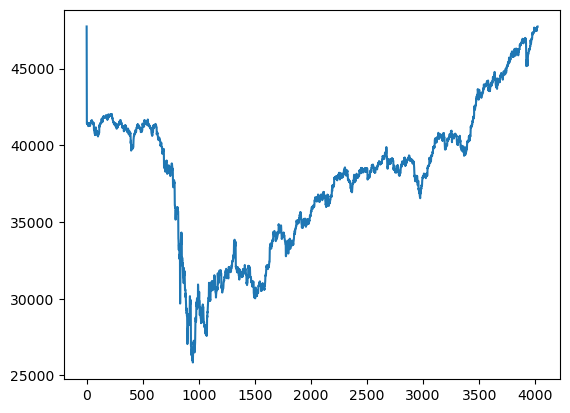

In [19]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [20]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [21]:
import numpy as np

In [22]:
df1

0       47746.22
1       41479.49
2       41417.40
3       41409.97
4       41376.39
          ...   
4016    47663.50
4017    47724.84
4018    47746.22
4019    47746.22
4020    47746.22
Name: Close, Length: 4021, dtype: float64

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [24]:
print(df1)

[[1.        ]
 [0.71386833]
 [0.71103337]
 ...
 [1.        ]
 [1.        ]
 [1.        ]]


In [25]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [26]:
training_size,test_size

(2613, 1408)

In [27]:
train_data

array([[1.        ],
       [0.71386833],
       [0.71103337],
       ...,
       [0.59061181],
       [0.59194596],
       [0.59523751]])

In [28]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [29]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(2512, 100)
(2512,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(1307, 100)
(1307,)


(None, None)

In [32]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
print(X_train.shape)

(2512, 100, 1)


In [34]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [41]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM

In [80]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(64))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001))


In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100, 64)           16896     
                                                                 
 lstm_12 (LSTM)              (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 53,089
Trainable params: 53,089
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 100, 64)           16896     
                                                                 
 lstm_12 (LSTM)              (None, 64)                33024     
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 53,089
Trainable params: 53,089
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100)

Epoch 1/100
79/79 [==============================] - 9s 79ms/step - loss: 0.0325 - val_loss: 2.2772e-04
Epoch 2/100
79/79 [==============================] - 7s 89ms/step - loss: 4.8254e-04 - val_loss: 4.1292e-04
Epoch 3/100
79/79 [==============================] - 8s 107ms/step - loss: 4.2667e-04 - val_loss: 3.7835e-04
Epoch 4/100
79/79 [==============================] - 6s 76ms/step - loss: 3.8726e-04 - val_loss: 2.9689e-04
Epoch 5/100
79/79 [==============================] - 6s 75ms/step - loss: 4.0091e-04 - val_loss: 1.5393e-04
Epoch 6/100
79/79 [==============================] - 6s 73ms/step - loss: 3.5259e-04 - val_loss: 3.6182e-04
Epoch 7/100
79/79 [==============================] - 5s 66ms/step - loss: 3.4497e-04 - val_loss: 6.2322e-04
Epoch 8/100
79/79 [==============================] - 6s 71ms/step - loss: 3.4678e-04 - val_loss: 2.2264e-04
Epoch 9/100
79/79 [==============================] - 5s 66ms/step - loss: 3.1350e-04 - val_loss: 1.2201e-04
Epoch 10/100
79/79 [===========

79/79 [==============================] - 5s 69ms/step - loss: 9.7751e-05 - val_loss: 3.7585e-05
Epoch 77/100
79/79 [==============================] - 5s 68ms/step - loss: 8.4057e-05 - val_loss: 3.6415e-05
Epoch 78/100
79/79 [==============================] - 5s 66ms/step - loss: 1.1528e-04 - val_loss: 8.9697e-05
Epoch 79/100
79/79 [==============================] - 5s 67ms/step - loss: 9.7459e-05 - val_loss: 3.1269e-05
Epoch 80/100
79/79 [==============================] - 5s 67ms/step - loss: 9.3451e-05 - val_loss: 3.0414e-05
Epoch 81/100
79/79 [==============================] - 5s 67ms/step - loss: 8.6837e-05 - val_loss: 6.3236e-05
Epoch 82/100
79/79 [==============================] - 5s 68ms/step - loss: 9.4203e-05 - val_loss: 4.4332e-05
Epoch 83/100
79/79 [==============================] - 5s 67ms/step - loss: 9.1655e-05 - val_loss: 1.6811e-04
Epoch 84/100
79/79 [==============================] - 5s 69ms/step - loss: 8.7066e-05 - val_loss: 1.0031e-04
Epoch 85/100
79/79 [============

In [50]:
import tensorflow as tf

In [51]:
tf.__version__

'2.12.0'

In [52]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

41/41 [==============================] - 2s 44ms/step


In [53]:
train_predict.shape

(2512, 1)

In [54]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

35922.4353241664

In [56]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

41863.82881829921

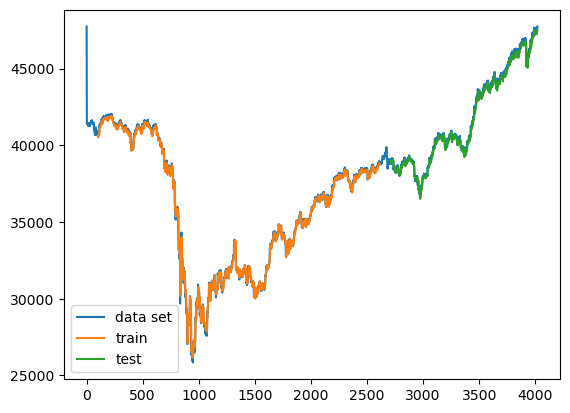

In [71]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['data set','train','test'])
plt.show()

In [58]:
len(test_data)

1408

In [59]:
x_input=test_data[1308:].reshape(1,-1)
x_input.shape


(1, 100)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [61]:
temp_input

[0.8936098615806363,
 0.8999039337837123,
 0.8999039337837123,
 0.8999039337837123,
 0.8983405748266331,
 0.8899959637578325,
 0.9008618564157072,
 0.8920962707679267,
 0.8868966411525023,
 0.888976401680976,
 0.8833987168037343,
 0.8910319630199859,
 0.8944933602903169,
 0.9076230186342888,
 0.9167296758769696,
 0.9149973791821222,
 0.9205800865326488,
 0.920575064059364,
 0.920575064059364,
 0.920575064059364,
 0.9252363758563313,
 0.9272951333147046,
 0.9313637932640413,
 0.929551136996634,
 0.9276608606875492,
 0.9321956974754309,
 0.9324335800737482,
 0.9335773342172886,
 0.931677469550114,
 0.9335887489292998,
 0.934606028063754,
 0.9358739742739788,
 0.9421461302299927,
 0.9405503534908015,
 0.9405503534908015,
 0.9405503534908015,
 0.9560437703980904,
 0.9558725497179195,
 0.9597001309495758,
 0.9550187292594678,
 0.9486634742000115,
 0.9500090404519126,
 0.9548032194966929,
 0.9550054881935348,
 0.9598448694978803,
 0.9613657657262769,
 0.9612749046186666,
 0.9650563704137971,

In [62]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9893788]
101
1 day input [0.89990393 0.89990393 0.89990393 0.89834057 0.88999596 0.90086186
 0.89209627 0.88689664 0.8889764  0.88339872 0.89103196 0.89449336
 0.90762302 0.91672968 0.91499738 0.92058009 0.92057506 0.92057506
 0.92057506 0.92523638 0.92729513 0.93136379 0.92955114 0.92766086
 0.9321957  0.93243358 0.93357733 0.93167747 0.93358875 0.93460603
 0.93587397 0.94214613 0.94055035 0.94055035 0.94055035 0.95604377
 0.95587255 0.95970013 0.95501873 0.94866347 0.95000904 0.95480322
 0.95500549 0.95984487 0.96136577 0.9612749  0.96505637 0.96284466
 0.96472032 0.96472032 0.96472032 0.98148214 0.9771409  0.97641081
 0.97560676 0.97574374 0.97703817 0.98005941 0.98158031 0.9796083
 0.98177481 0.98142233 0.98198713 0.9836135  0.98208027 0.98208027
 0.98208027 0.99507524 0.99667832 0.9951177  0.9859526  0.98500153
 0.98812687 0.98862547 0.9875849  0.99394564 0.99178826 0.99149832
 0.99193436 0.9933402  0.99392098 0.99392098 0.99392098 0.98986511
 0.9912198  0.9875639  0.99527522 0

8 day output [[0.9378374]]
9 day input [0.8889764  0.88339872 0.89103196 0.89449336 0.90762302 0.91672968
 0.91499738 0.92058009 0.92057506 0.92057506 0.92057506 0.92523638
 0.92729513 0.93136379 0.92955114 0.92766086 0.9321957  0.93243358
 0.93357733 0.93167747 0.93358875 0.93460603 0.93587397 0.94214613
 0.94055035 0.94055035 0.94055035 0.95604377 0.95587255 0.95970013
 0.95501873 0.94866347 0.95000904 0.95480322 0.95500549 0.95984487
 0.96136577 0.9612749  0.96505637 0.96284466 0.96472032 0.96472032
 0.96472032 0.98148214 0.9771409  0.97641081 0.97560676 0.97574374
 0.97703817 0.98005941 0.98158031 0.9796083  0.98177481 0.98142233
 0.98198713 0.9836135  0.98208027 0.98208027 0.98208027 0.99507524
 0.99667832 0.9951177  0.9859526  0.98500153 0.98812687 0.98862547
 0.9875849  0.99394564 0.99178826 0.99149832 0.99193436 0.9933402
 0.99392098 0.99392098 0.99392098 0.98986511 0.9912198  0.9875639
 0.99527522 0.99407074 0.99088512 0.99049018 0.98659867 0.98907977
 0.99455427 0.99727965 0.

17 day output [[0.90385425]]
18 day input [0.92057506 0.92057506 0.92523638 0.92729513 0.93136379 0.92955114
 0.92766086 0.9321957  0.93243358 0.93357733 0.93167747 0.93358875
 0.93460603 0.93587397 0.94214613 0.94055035 0.94055035 0.94055035
 0.95604377 0.95587255 0.95970013 0.95501873 0.94866347 0.95000904
 0.95480322 0.95500549 0.95984487 0.96136577 0.9612749  0.96505637
 0.96284466 0.96472032 0.96472032 0.96472032 0.98148214 0.9771409
 0.97641081 0.97560676 0.97574374 0.97703817 0.98005941 0.98158031
 0.9796083  0.98177481 0.98142233 0.98198713 0.9836135  0.98208027
 0.98208027 0.98208027 0.99507524 0.99667832 0.9951177  0.9859526
 0.98500153 0.98812687 0.98862547 0.9875849  0.99394564 0.99178826
 0.99149832 0.99193436 0.9933402  0.99392098 0.99392098 0.99392098
 0.98986511 0.9912198  0.9875639  0.99527522 0.99407074 0.99088512
 0.99049018 0.98659867 0.98907977 0.99455427 0.99727965 0.9962231
 0.99902381 1.         1.         1.         0.98937881 0.98302388
 0.97483867 0.96652174 

26 day output [[0.8661018]]
27 day input [0.93357733 0.93167747 0.93358875 0.93460603 0.93587397 0.94214613
 0.94055035 0.94055035 0.94055035 0.95604377 0.95587255 0.95970013
 0.95501873 0.94866347 0.95000904 0.95480322 0.95500549 0.95984487
 0.96136577 0.9612749  0.96505637 0.96284466 0.96472032 0.96472032
 0.96472032 0.98148214 0.9771409  0.97641081 0.97560676 0.97574374
 0.97703817 0.98005941 0.98158031 0.9796083  0.98177481 0.98142233
 0.98198713 0.9836135  0.98208027 0.98208027 0.98208027 0.99507524
 0.99667832 0.9951177  0.9859526  0.98500153 0.98812687 0.98862547
 0.9875849  0.99394564 0.99178826 0.99149832 0.99193436 0.9933402
 0.99392098 0.99392098 0.99392098 0.98986511 0.9912198  0.9875639
 0.99527522 0.99407074 0.99088512 0.99049018 0.98659867 0.98907977
 0.99455427 0.99727965 0.9962231  0.99902381 1.         1.
 1.         0.98937881 0.98302388 0.97483867 0.96652174 0.95878106
 0.95198828 0.94629061 0.94163954 0.93783742 0.9345994  0.93161654
 0.9286077  0.92535943 0.921743

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [64]:
import matplotlib.pyplot as plt

In [65]:
len(df1)

4021

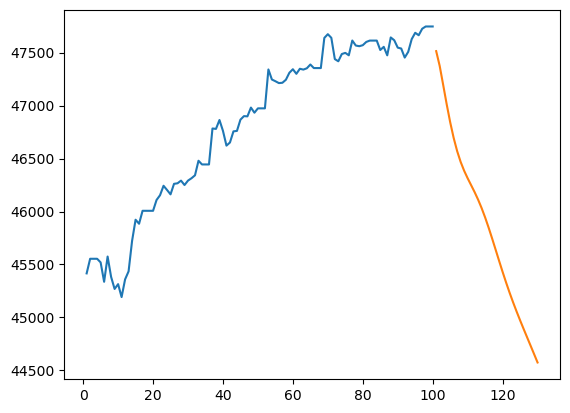

In [66]:
plt.plot(day_new,scaler.inverse_transform(df1[3921:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

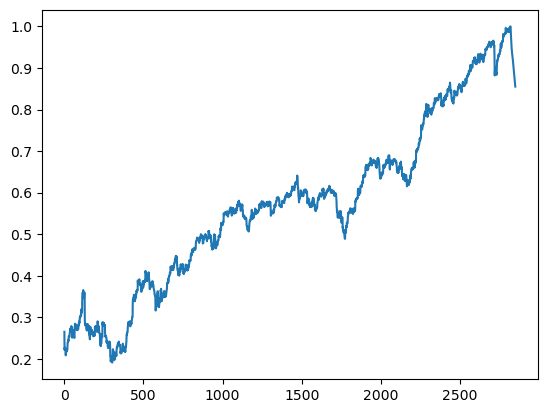

In [67]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [68]:
df3=scaler.inverse_transform(df3).tolist()

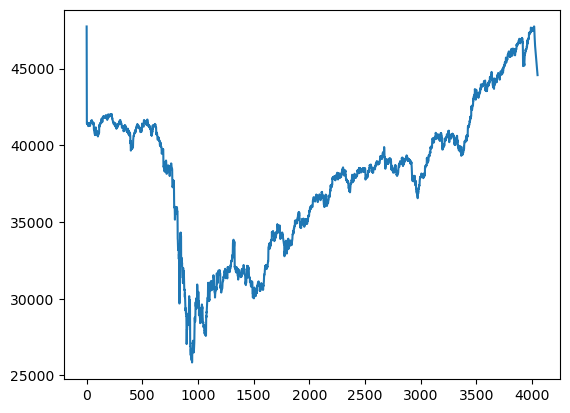

In [69]:
plt.plot(df3)